In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib
import matplotlib.pyplot as plt 

In [2]:
heartdata = pd.read_csv('heart_disease_data.csv')
heartdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heartdata.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
heartdata.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
heartdata['target'].value_counts() #checking distribution of target data 

target
1    165
0    138
Name: count, dtype: int64

In [6]:
#Shuffling the dataset as all the target columns are together here 
heartdata2 = heartdata # String the original one before shuffling
heartdata = heartdata.sample(frac = 1).reset_index(drop=True)
heartdata

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
4,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
299,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
300,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
301,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1


{'whiskers': [<matplotlib.lines.Line2D at 0x16d67cbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x16d67d120>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d67c940>],
 'medians': [<matplotlib.lines.Line2D at 0x16d67d660>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d67d900>],
 'means': []}

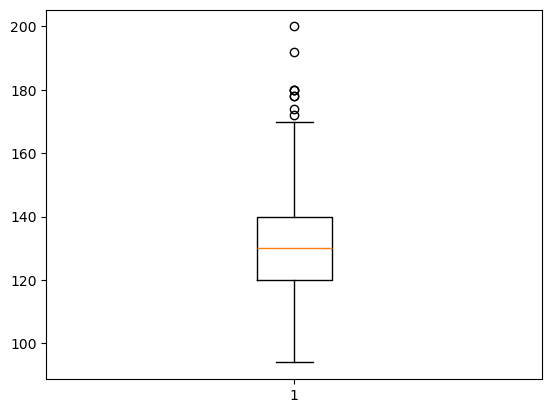

In [7]:
plt.boxplot(heartdata['trestbps'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16d759630>,
 'caps': [<matplotlib.lines.Line2D at 0x16d759b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d6399f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16d75a0b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d75a350>],
 'means': []}

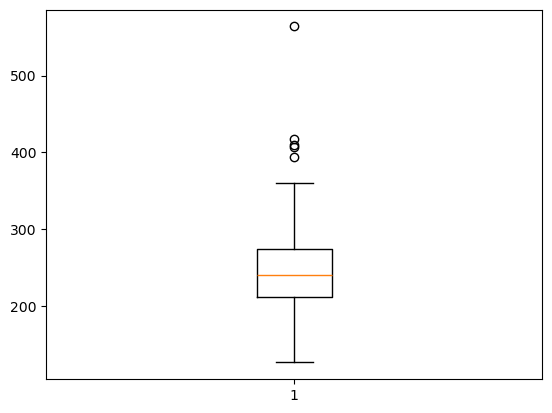

In [8]:
plt.boxplot(heartdata['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16d7b6920>,
 'caps': [<matplotlib.lines.Line2D at 0x16d7b6e60>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d7b6680>],
 'medians': [<matplotlib.lines.Line2D at 0x16d7b73a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d7b7640>],
 'means': []}

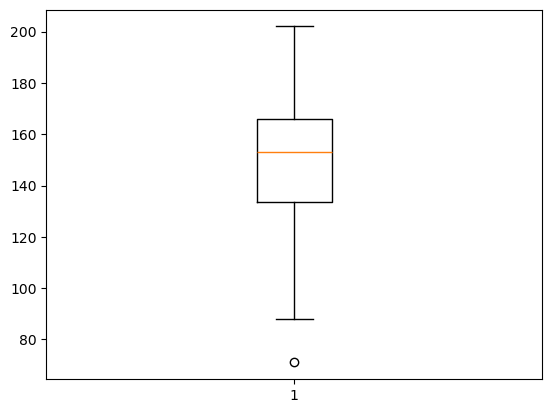

In [9]:
plt.boxplot(heartdata['thalach'])

In [10]:
df =  heartdata
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
4,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
299,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1
300,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
301,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1


In [11]:
df['zscore'] = ((df.trestbps - df.trestbps.mean())/df.trestbps.std())
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,zscore
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,1.617973
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,0.477601
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,-0.092585
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,0.819713
4,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,0.477601


In [12]:
print("The outliers are: ")
df[ (df.zscore <-2) | (df.zscore >2)] # here -2 and 2 are hit and trail 

The outliers are: 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,zscore
5,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0,3.898716
15,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,2.188159
67,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0,2.758344
69,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0,2.758344
77,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0,3.442567
98,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0,2.644307
107,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1,2.188159
132,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0,2.188159
207,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,2.302196
208,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0,2.416233


In [13]:
df = df[(df.zscore > -2) & (df.zscore < 2)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,zscore
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,1.617973
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,0.477601
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,-0.092585
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,0.819713
4,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,0.477601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,-0.092585
299,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1,-0.092585
300,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,-0.662770
301,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1,-1.118919


{'whiskers': [<matplotlib.lines.Line2D at 0x16d836ad0>,
 'caps': [<matplotlib.lines.Line2D at 0x16d837010>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d836830>],
 'medians': [<matplotlib.lines.Line2D at 0x16d837550>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d8377f0>],
 'means': []}

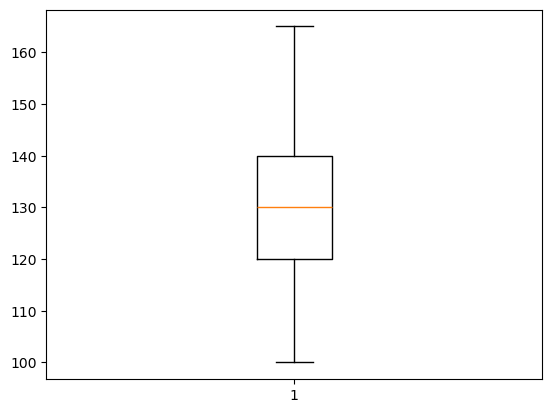

In [14]:
plt.boxplot(df['trestbps'])

In [15]:
df['zscore'] = ((df.chol - df.chol.mean())/df.chol.std())
df.head()

/var/folders/x3/4pnf30yx1435_7x3jqf7wrdc0000gn/T/ipykernel_64233/665713706.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = ((df.chol - df.chol.mean())/df.chol.std())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,zscore
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0.452218
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,-0.372685
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,1.622428
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,0.624872
4,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,3.291417


In [16]:
df = df[(df.zscore > -2) & (df.zscore < 2)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,zscore
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,0.452218
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,-0.372685
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,1.622428
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,0.624872
6,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0,1.046915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1,0.010991
298,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0.087726
299,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1,-0.929014
301,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1,0.087726


{'whiskers': [<matplotlib.lines.Line2D at 0x16d8b6590>,
 'caps': [<matplotlib.lines.Line2D at 0x16d8b6ad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d8b62f0>],
 'medians': [<matplotlib.lines.Line2D at 0x16d8b7010>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d8b72b0>],
 'means': []}

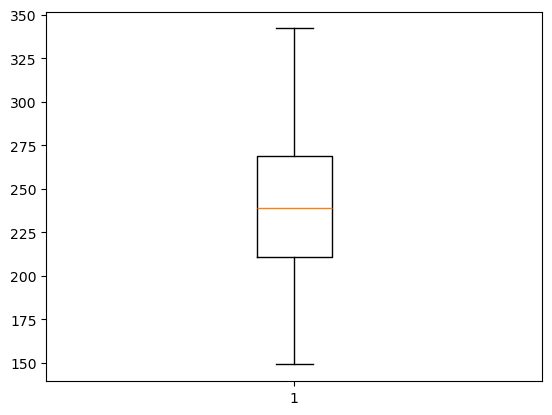

In [17]:
plt.boxplot(df['chol'])

In [18]:
df['zscore'] = ((df.thalach - df.thalach.mean())/df.thalach.std())
df.head()

/var/folders/x3/4pnf30yx1435_7x3jqf7wrdc0000gn/T/ipykernel_64233/1107522126.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['zscore'] = ((df.thalach - df.thalach.mean())/df.thalach.std())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,zscore
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,-1.598730
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,1.229328
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,0.843684
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,0.115245
6,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0,0.929382


In [19]:
df = df[(df.zscore > -2) & (df.zscore < 2)]
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,zscore
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0,-1.598730
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,1.229328
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0,0.843684
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1,0.115245
6,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0,0.929382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1,1.015081
298,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1.614972
299,58,0,0,130,197,0,1,131,0,0.6,1,0,2,1,-0.784592
301,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1,1.272177


{'whiskers': [<matplotlib.lines.Line2D at 0x16d92eda0>,
 'caps': [<matplotlib.lines.Line2D at 0x16d92f2e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d92de70>],
 'medians': [<matplotlib.lines.Line2D at 0x16d92f820>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d92fac0>],
 'means': []}

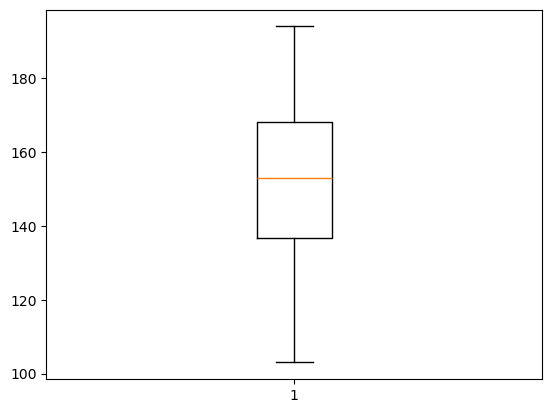

In [20]:
plt.boxplot(df['thalach'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16d9a1570>,
 'caps': [<matplotlib.lines.Line2D at 0x16d9a1ab0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d9a12d0>],
 'medians': [<matplotlib.lines.Line2D at 0x16d9a1ff0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d9a2290>],
 'means': []}

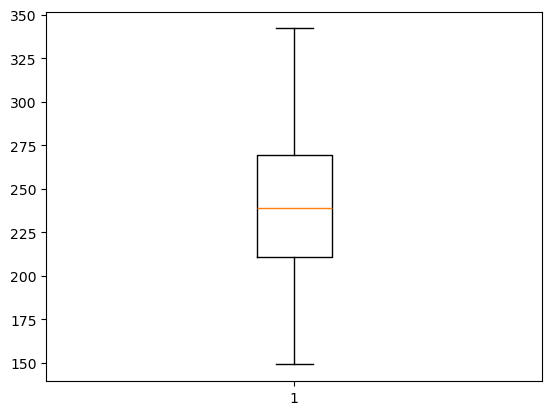

In [21]:
heartdata = df
plt.boxplot(heartdata['chol'])

In [22]:
x = heartdata.drop(columns = ['target'] , axis = 1) #features (input data)
y  = heartdata['target'] #target output data


In [23]:

x.drop('zscore', axis = 1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,zscore
0,70,1,2,160,269,0,1,112,1,2.9,1,1,3,-1.598730
1,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1.229328
2,61,0,0,130,330,0,0,169,0,0.0,2,0,2,0.843684
3,66,0,2,146,278,0,0,152,0,0.0,1,1,2,0.115245
6,58,1,0,125,300,0,0,171,0,0.0,2,2,3,0.929382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1.015081
298,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1.614972
299,58,0,0,130,197,0,1,131,0,0.6,1,0,2,-0.784592
301,41,1,2,112,250,0,1,179,0,0.0,2,0,2,1.272177


In [24]:
y

0      0
1      1
2      0
3      1
6      0
      ..
296    1
298    1
299    1
301    1
302    1
Name: target, Length: 268, dtype: int64

In [25]:
x_train , x_test, y_train , y_test = train_test_split(x,y, stratify = y, test_size = 0.2, random_state =2 ) #stratify defines the base 



In [26]:
model = LogisticRegression()
model

LogisticRegression()

#Testing other models

#TODO: RNN, CNN and if they do not yield better than 90% then try grid search CV on KNN

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [28]:
dt = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=400, random_state=42, criterion='entropy')
svc = SVC(kernel='linear', random_state=42)
gbm = GradientBoostingClassifier(n_estimators=500, random_state=42, criterion='squared_error')
xgb = XGBClassifier(
    learning_rate=0.01,  # Learning rate or step size shrinkage used in update to prevent overfitting.
    n_estimators=25,     # Number of boosting rounds (trees) to be built.
    max_depth=15,        # Maximum depth of each tree.
    gamma=0.6,           # Minimum loss reduction required to make a further partition on a leaf node of the tree.
    subsample=0.52,      # Subsample ratio of the training instance. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. 
    colsample_bytree=0.6,# Subsample ratio of columns when constructing each tree.
    seed=27,             # Random number seed.
    reg_lambda=2,        # L2 regularization term on weights (lambda).
    booster='dart',      # The type of boosting model to use, 'dart' stands for Dropouts meet Multiple Additive Regression Trees.
    colsample_bylevel=0.6,  # Subsample ratio of columns for each level.
    colsample_bynode=0.5    # Subsample ratio of columns for each split.
)
svc2 = SVC(kernel='rbf' , C=2)



In [29]:
xgb

XGBClassifier(base_score=None, booster='dart', callbacks=None,
              colsample_bylevel=0.6, colsample_bynode=0.5, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.6, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=25, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
model.fit(x_train, y_train)
dt.fit(x_train, y_train)
rfc.fit(x_train, y_train)
svc.fit(x_train, y_train)
gbm.fit(x_train, y_train)
xgb.fit(x_train, y_train)
svc2.fit(x_train, y_train)


/opt/homebrew/anaconda3/envs/Tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(C=2)

In [31]:
prediction = model.predict(x_test) #prediction with test data

score = accuracy_score(prediction , y_test) #accuracy score on test data

print("Accuracy Percentage - ",score*100 ,"%")

Accuracy Percentage -  88.88888888888889 %


In [32]:
prediction2 = dt.predict(x_test) #prediction with test data

score2 = accuracy_score(prediction2 , y_test) #accuracy score on test data

print("Accuracy Percentage - ",score2*100 ,"%")

Accuracy Percentage -  72.22222222222221 %


In [33]:
prediction3 = rfc.predict(x_test) #prediction with test data

score3 = accuracy_score(prediction3 , y_test) #accuracy score on test data

print("Accuracy Percentage - ",score3*100 ,"%")

Accuracy Percentage -  85.18518518518519 %


In [34]:
prediction4 = svc.predict(x_test) #prediction with test data

score4 = accuracy_score(prediction4 , y_test) #accuracy score on test data

print("Accuracy Percentage - ",score4*100 ,"%")

Accuracy Percentage -  87.03703703703704 %


In [35]:
prediction5 = gbm.predict(x_test) #prediction with test data

score5 = accuracy_score(prediction5 , y_test) #accuracy score on test data

print("Accuracy Percentage - ",score5*100 ,"%")

Accuracy Percentage -  79.62962962962963 %


In [36]:
prediction6 = svc2.predict(x_test) #prediction with test data

score6 = accuracy_score(prediction6 , y_test) #accuracy score on test data

print("Accuracy Percentage - ",score6*100 ,"%")

Accuracy Percentage -  59.25925925925925 %


# Saving the model for further use 

In [37]:
#saving the model using joblib
joblib.dump(svc, 'Heart Disease Predictor.joblib')

['Heart Disease Predictor.joblib']

In [38]:
# load_model = joblib.load('Heart Disease Predictor.joblib')

In [39]:
# input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# #change the input data to numpy
# input_data_as_numpy_array = np.asarray(input_data)

# #reshape the numpy array as we are predicting for only one instance
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# prediction = svc.predict(input_data_reshaped)
# print(prediction)

# if(prediction[0] == 0):
#     print('The person does not have a heart disease')
# else:
#     print('The person has a heart disease')




In [1]:
# saving in pickle 
import pickle